### Clustering on the Description dataset 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from loader import Loader

We scraped just over ~20k of items from Immobiliare. Hence, the description matrix is giant, 2.1Gb. That's why we use an external module (to reuse a python file created during previous homeworks) to load it lazily.

Then, we proceed to compute the best no. of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). 

In [8]:
ssd = {}

for k in range(2, 20):
    km = MiniBatchKMeans(n_clusters= k, init ="k-means++", batch_size = 1000)
    
    # we load a portion for debug purposes
    data_loader = Loader(csv=['description-dataset-with-header.tsv'], separator='\t', nrows=10000, chunksize=1000).iterate()
    
    for d in data_loader:
        descr_data = d.drop('id', 1)
        descr_data = descr_data.fillna(value=0.0)
        descr_matrix = descr_data.as_matrix(columns = None)
        
        km.partial_fit(descr_matrix)
        
        ssd[k] = km.inertia_

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # 

KeyboardInterrupt: 

As we could notice from the plot below, it seems that the elbow method isn't applicable to this dataset. Perhaps, due to too many noisy data...

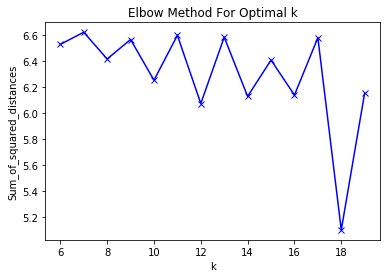

In [45]:
# plotting the ssd (inertia)
plt.plot(list(range(6, 20)), ssd.values(), 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We infer that because of the huge quantity of data scraped from Immobiliare.it, we're experiencing issues of really long timing of training whilst dealing with noisy data.
Nonetheless, the description matrix should have been implemented as a sparse matrix instead of a dense one to save up some space, reducing the dimensionality.
In fact, the no. of words sharply increased with the increase of the no. of ads, causing to have a ~20k x ~28k matrix!!  

What we could do to reduce the dimensionality of the data, right now? Using the PCA module from sklearn... but it could take some time.

In [ ]:
# Apply this to retain a 50% of variance and reduce dimensionality
pca = PCA(0.50).fit(noisy)

Unfortunately, we weren't able to run PCA on time.
That's why we proceed evaluating our big dataset with the same number of clusters we identified in the other one: **7**.

In [9]:
km = MiniBatchKMeans(n_clusters=7, init ="k-means++", batch_size = 1000)

# we load a portion for debug purposes
data_loader = Loader(csv=['description-dataset-with-header.tsv'], separator='\t', nrows=10000, chunksize=1000).iterate()

for d in data_loader:
    descr_data = d.drop('id', 1)
    descr_data = descr_data.fillna(value=0.0)
    descr_matrix = descr_data.as_matrix(columns = None)

    km.partial_fit(descr_matrix)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: M